In [24]:
import matplotlib.pyplot as plt

In [25]:
from preprocessing import get_images

In [26]:
Xm_train, Xm_test, ym_train, ym_test, Xf_train, Xf_test, yf_train, yf_test = get_images(0,100, split=True)

In [27]:
Xm_train.shape

(31, 200, 200, 3)

In [28]:
X_train, X_test, y_train, y_test = get_images(0,100)

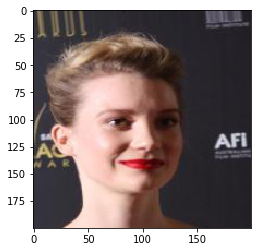

In [29]:
plt.imshow(Xf_train[34])
plt.show()

In [31]:
import cv2
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
AUTOTUNE = tf.data.experimental.AUTOTUNE
from keras.callbacks import TensorBoard
from livelossplot.keras import PlotLossesCallback

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report 

import datetime
# from src.cnn_gender import get_and_clean_data

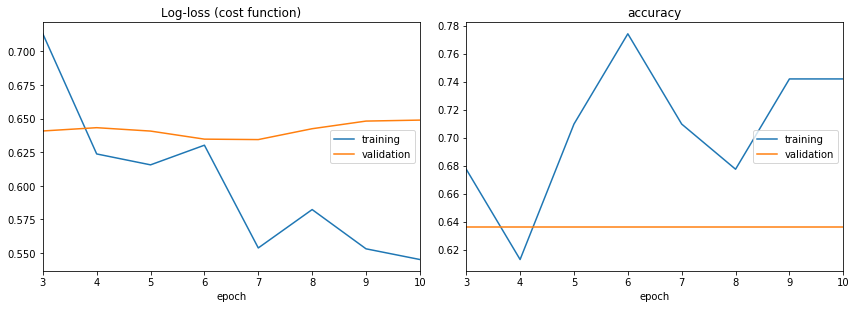

Log-loss (cost function):
training   (min:    0.545, max:    1.176, cur:    0.545)
validation (min:    0.634, max:    1.268, cur:    0.649)

accuracy:
training   (min:    0.548, max:    0.774, cur:    0.742)
validation (min:    0.636, max:    0.636, cur:    0.636)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 200, 200, 2)       56        
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 200, 200, 2)       38        
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 100, 100, 2)       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 20000)             0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)             

In [59]:
%%time
input_img = (200, 200, 3)

cnn_m = Sequential()
batch_size=32
epochs=10

cnn_m.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_m.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_m.add(MaxPooling2D((2, 2), strides=(2,2)))
cnn_m.add(Flatten())
cnn_m.add(Dense(64, activation='relu'))
cnn_m.add(Dropout(0.5))
cnn_m.add(Dense(1, activation='sigmoid'))

cnn_m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_m.fit(Xm_train, ym_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(Xm_test, ym_test),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn_m.summary()

In [60]:
cnn_m.predict_proba(X_test)

array([[0.41097146],
       [0.32385153],
       [0.386806  ],
       [0.34666163],
       [0.3993048 ],
       [0.35088754],
       [0.33490604],
       [0.26960048],
       [0.23574546],
       [0.25367337],
       [0.1612356 ],
       [0.37534726],
       [0.19002485],
       [0.2094115 ],
       [0.23289824],
       [0.4388436 ],
       [0.2517904 ],
       [0.21395463],
       [0.17610478],
       [0.2139388 ],
       [0.3115094 ],
       [0.33517772],
       [0.30633304],
       [0.31870776],
       [0.33848366]], dtype=float32)

In [61]:
y_test

75    1
76    0
77    0
78    1
79    1
80    1
81    1
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    1
90    1
91    0
92    0
93    0
94    0
95    0
96    0
97    0
98    0
99    0
Name: male, dtype: int64